In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dff=pd.read_csv('books.csv', encoding='latin-1')
dff

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
...,...,...,...,...
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8


In [3]:
dff.head()

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


In [4]:
dff.shape

(10000, 4)

In [5]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10000 non-null  int64 
 1   User.ID      10000 non-null  int64 
 2   Book.Title   10000 non-null  object
 3   Book.Rating  10000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 312.6+ KB


In [6]:
df=dff.drop('Unnamed: 0', axis=1)

In [7]:
df.head()

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6


In [8]:
len(df['User.ID'].unique())

2182

In [9]:
len(df['Book.Title'].unique())

9659

In [10]:
df = df.rename({'User.ID':'UserID', 'Book.Title':'Book', 'Book.Rating':'Rating'}, axis = 1)

In [11]:
df.columns

Index(['UserID', 'Book', 'Rating'], dtype='object')

In [12]:
df.isna().sum()

UserID    0
Book      0
Rating    0
dtype: int64

In [13]:
df[df.duplicated()]

,UserID,Book,Rating
5051,2152,Le nouveau soleil de Teur,7
7439,3757,The Magician's Tale,7


In [14]:
df.dtypes

UserID     int64
Book      object
Rating     int64
dtype: object

In [15]:
df.Rating.unique()

array([ 5,  3,  6,  8,  7, 10,  9,  4,  1,  2], dtype=int64)

# Data Visualization

<Axes: ylabel='count'>

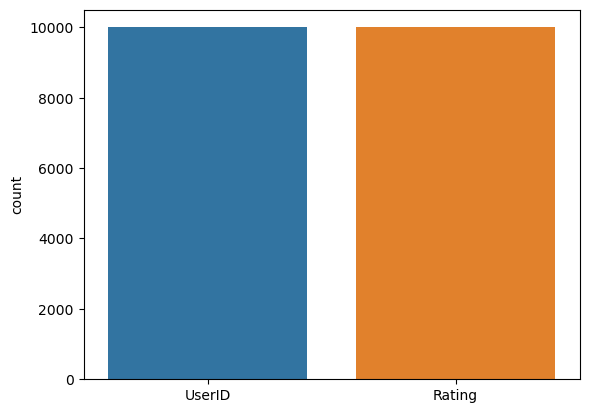

In [16]:
import seaborn as sns
sns.countplot(df)

In [17]:
most_rated_a = df.Book.value_counts().head()
most_rated_a

Book
Fahrenheit 451                                   5
Charlie and the Chocolate Factory                4
The Subtle Knife (His Dark Materials, Book 2)    4
Vanished                                         4
Ender's Game (Ender Wiggins Saga (Paperback))    4
Name: count, dtype: int64

In [18]:
least_rated_a = df.Book.value_counts().tail()
least_rated_a

Book
Murder on St. Mark's Place (Gaslight Mysteries)             1
State of Grace                                              1
Valsalva's Maneuver: Mots Justes and Indispensable Terms    1
I love you, I hate you                                      1
Kids Say the Darndest Things                                1
Name: count, dtype: int64

In [19]:
array = ([['Fahrenheit 451',5], ['Charlie and the Chocolate Factory',4],['The Subtle Knife (His Dark Materials, Book 2)',4],
         ['Vanished',4],['Enders Game (Ender Wiggins Saga (Paperback))',4],['Murder on St. Marks Place (Gaslight Mysteries)',1],
          ['State of Grace',1],['Valsalvas Maneuver: Mots Justes and Indispensable Terms',1],
          ['I love you, I hate you',1],['Kids Say the Darndest Things',1]])
     


In [20]:
mnl_rated = pd.DataFrame(array,columns= ['Books', 'Number_of_Rating'])
mnl_rated

,Books,Number_of_Rating
0,Fahrenheit 451,5
1,Charlie and the Chocolate Factory,4
2,"The Subtle Knife (His Dark Materials, Book 2)",4
3,Vanished,4
4,Enders Game (Ender Wiggins Saga (Paperback)),4
5,Murder on St. Marks Place (Gaslight Mysteries),1
6,State of Grace,1
7,Valsalvas Maneuver: Mots Justes and Indispensa...,1
8,"I love you, I hate you",1
9,Kids Say the Darndest Things,1


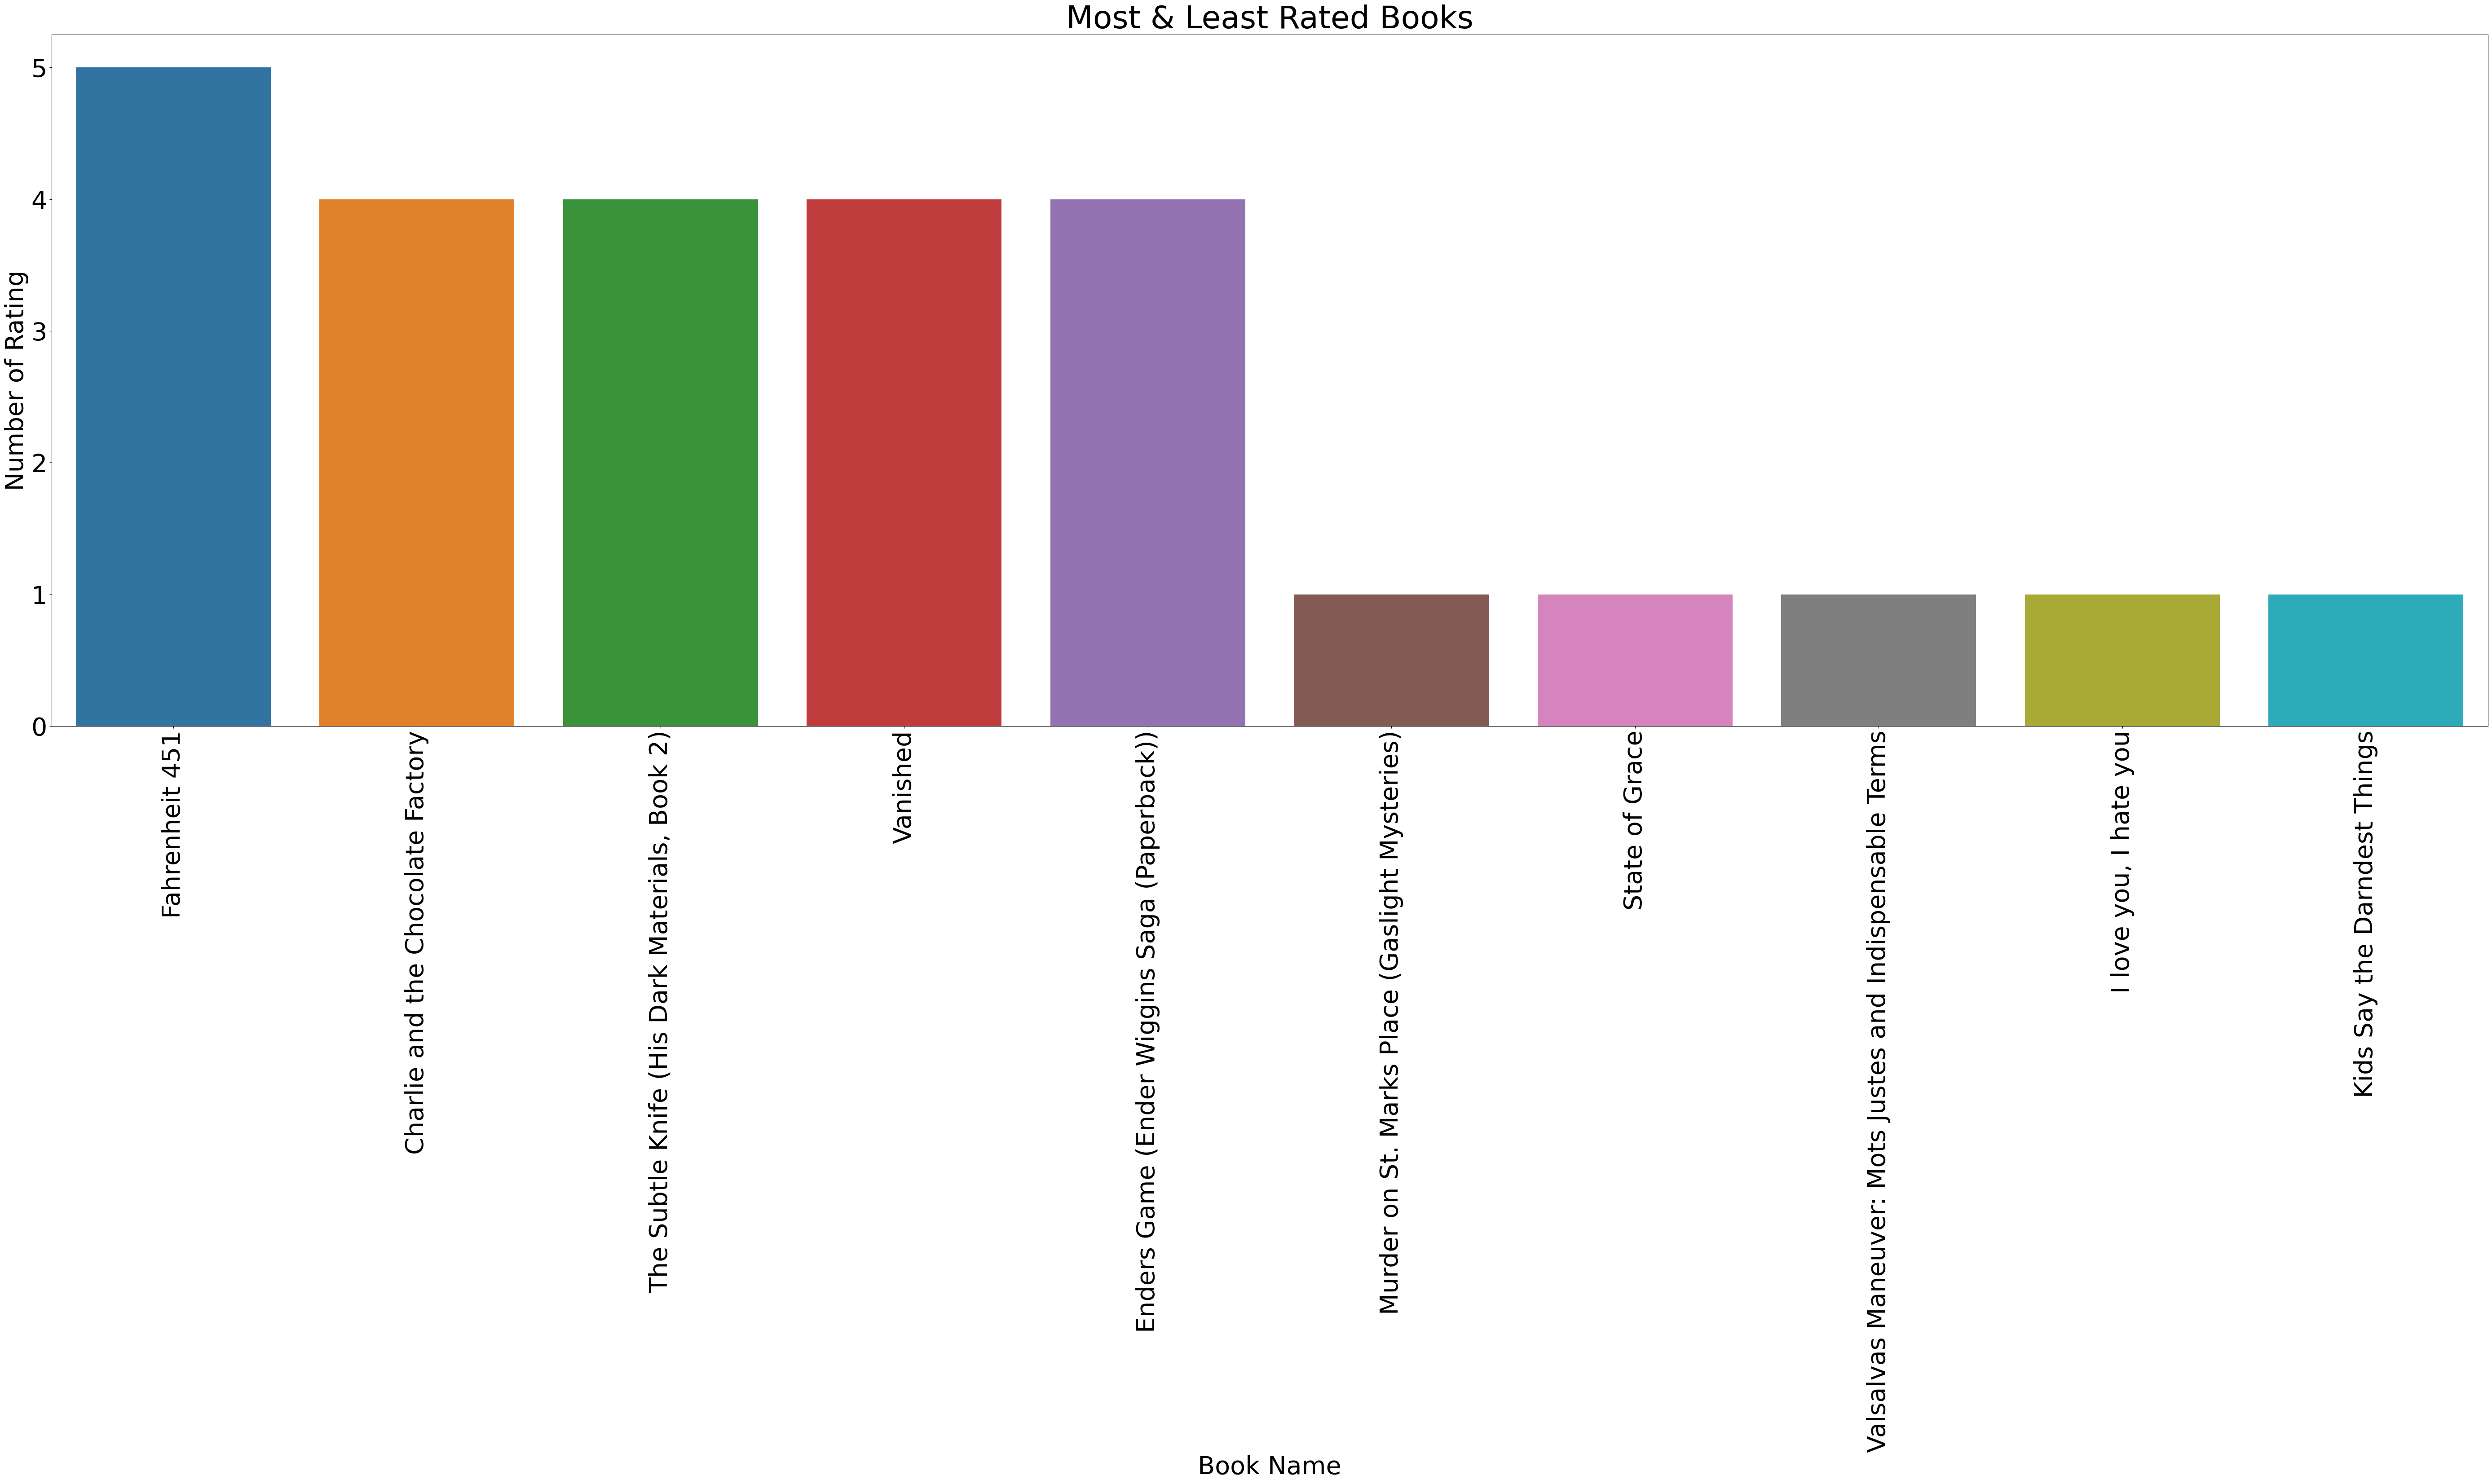

In [21]:
plt.figure(figsize=(70,20))
plt.yticks(rotation = 0, fontsize = 40)
plt.xticks(rotation = 90, fontsize = 40)
sns.barplot(x = mnl_rated['Books'], y = mnl_rated['Number_of_Rating'])
plt.xlabel('Book Name', size=40)
plt.ylabel('Number of Rating', size=40)
plt.title('Most & Least Rated Books', size=50)
plt.show()

In [22]:
highest_rated = pd.DataFrame(df.groupby('Book')['Rating'].count())

In [23]:
highest_rated.head()

,Rating
Book,
"Jason, Madison &amp",1
Other Stories;Merril;1985;McClelland &amp,1
Repairing PC Drives &amp,1
'48,1
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,1


C:\Users\vishal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Rating', ylabel='Count'>

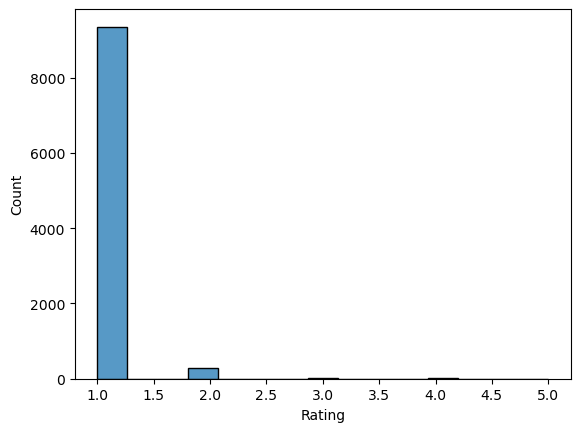

In [24]:
sns.histplot(highest_rated['Rating'])

In [25]:
df

,UserID,Book,Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


# Popularity Recommeder System

In [26]:
num_rating = df.groupby('Book').count()['Rating'].reset_index()
num_rating.rename(columns={'Rating':'num_ratings'}, inplace=True)
num_rating

,Book,num_ratings
0,"Jason, Madison &amp",1
1,Other Stories;Merril;1985;McClelland &amp,1
2,Repairing PC Drives &amp,1
3,'48,1
4,'O Au No Keia: Voices from Hawai'I's Mahu and ...,1
...,...,...
9654,"\Surely You're Joking, Mr. Feynman!\: Adventur...",1
9655,"\Well, there's your problem\: Cartoons",1
9656,iI Paradiso Degli Orchi,1
9657,stardust,1


In [27]:
avg_rating = df.groupby('Book').mean()['Rating'].reset_index()
avg_rating.rename(columns={'Rating':'avg_ratings'}, inplace=True)
avg_rating

,Book,avg_ratings
0,"Jason, Madison &amp",8.0
1,Other Stories;Merril;1985;McClelland &amp,6.0
2,Repairing PC Drives &amp,4.0
3,'48,7.0
4,'O Au No Keia: Voices from Hawai'I's Mahu and ...,8.0
...,...,...
9654,"\Surely You're Joking, Mr. Feynman!\: Adventur...",8.0
9655,"\Well, there's your problem\: Cartoons",9.0
9656,iI Paradiso Degli Orchi,7.0
9657,stardust,5.0


# Collaborative Filtering based Recommeder System

In [28]:
df.UserID.unique().shape

(2182,)

In [29]:
df.Book.unique().shape

(9659,)

In [30]:
df.shape

(10000, 3)

In [31]:
x = df.groupby('UserID').count()['Rating'] >= 2
active_users = x[x].index
active_users

Index([     8,     14,     17,     26,     39,     53,     56,     69,     87,
           92,
       ...
       278732, 278773, 278782, 278798, 278818, 278832, 278843, 278844, 278851,
       278854],
      dtype='int64', name='UserID', length=859)

In [32]:
active_users_df = df[df['UserID'].isin(active_users)]

In [33]:
y = active_users_df.groupby('Book').count()['Rating'] >= 2
famous_book = y[y].index
famous_book

Index(['1st to Die: A Novel', '2nd Chance', 'A Density of Souls',
       'A Light in the Attic', 'A Little Princess', 'A Map of the World',
       'A Reporter's Life', 'A Time to Kill', 'A Woman's Worth',
       'Acceptable Risk',
       ...
       'White Oleander : A Novel', 'Wild Seed', 'Wildest Hearts',
       'Winter's Tale', 'Wish You Well', 'Witch', 'Women on the Case',
       'Wouldn't Take Nothing for My Journey Now', 'Wuthering Heights',
       'Young Wives'],
      dtype='object', name='Book', length=243)

In [34]:
famous_book_df = active_users_df[active_users_df['Book'].isin(famous_book)]

In [35]:
famous_book_df.shape

(511, 3)

In [36]:
famous_book_df

,UserID,Book,Rating
18,276762,The Testament,8
36,276798,Lying Awake,5
37,276798,To Kill a Mockingbird,7
44,276813,Icebound,8
47,276813,Isle of Dogs,8
...,...,...,...
9943,162052,Empire Falls,4
9945,162052,Rose,8
9948,162052,Leaving Home,1
9952,162052,Dave Barry in Cyberspace,8


In [37]:
final_df = famous_book_df.drop_duplicates()

In [38]:
final_df.shape

(509, 3)

In [39]:
user_df = final_df.pivot_table(index = 'Book', columns = 'UserID', values = 'Rating')

In [40]:
user_df.fillna(0, inplace=True)

In [41]:
user_df

UserID,53,160,183,242,254,392,444,446,486,503,...,278582,278633,278637,278648,278668,278675,278694,278843,278844,278851
Book,,,,,,,,,,,,,,,,,,,,,
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Density of Souls,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Light in the Attic,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Little Princess,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Witch,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Women on the Case,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Wouldn't Take Nothing for My Journey Now,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
from sklearn.metrics.pairwise import cosine_similarity

In [43]:
similarity_scores = cosine_similarity(user_df)

In [44]:
similarity_scores

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [45]:
def recommend(book_name):
    index = np.where(user_df.index == book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])), key=lambda x:x[1], reverse = True)[1:6]

    for i in similar_items:
        print(user_df.index[i[0]])
     

# Recommendations Results

In [46]:
recommend('Young Wives')

Icebound
1st to Die: A Novel
2nd Chance
A Density of Souls
A Light in the Attic


In [47]:
recommend("Wouldn't Take Nothing for My Journey Now")

A Time to Kill
Life Before Man
The Hobbit: Or There and Back Again
The Adventures of Tom Sawyer
How Stella Got Her Groove Back


In [48]:
recommend('A Little Princess')

The Magician's Tale
Juniper
How to Make an American Quilt
The Smoke Jumper
Alice's Tulips


# Let us try to build a recommeder system for our original data

In [49]:
recommend_df = df.pivot_table(index = 'Book', columns = 'UserID', values = 'Rating')

In [50]:
recommend_df.fillna(0, inplace=True)

In [51]:
recommend_df

UserID,8,9,10,12,14,16,17,19,22,26,...,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
Book,,,,,,,,,,,,,,,,,,,,,
"Jason, Madison &amp",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Other Stories;Merril;1985;McClelland &amp,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Repairing PC Drives &amp,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"\Well, there's your problem\: Cartoons",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
iI Paradiso Degli Orchi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0


In [52]:
final_similarity_score = cosine_similarity(recommend_df)

In [53]:
final_similarity_score

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [54]:
def recommend(book_name):
    index = np.where(recommend_df.index == book_name)[0][0]
    similar_items = sorted(list(enumerate(final_similarity_score[index])), key=lambda x:x[1], reverse = True)[1:6]

    for i in similar_items:
        print(recommend_df.index[i[0]])
     

# Recommendation Results for Original data

In [55]:
recommend("stardust")

Fires of Aggar
Kamikaze Lust
Rule of the Bone : Novel, A
Stone Butch Blues
The Adventures of Dougal


In [56]:
recommend("'48")

Angry Men, Passive Men: Understanding the Roots of Men's Anger and How to Move Beyond It
Her Father's House
The Day
The Homeschooling Book of Answers : The 88 Most Important Questions Answered by Homeschooling's Most Respected Voices
The Scold's Bridle


In [57]:
recommend("iI Paradiso Degli Orchi")

Fantastic Imagination
Hitched
Huis Clos Suivi de Les Mouches (Folio Ser. No. 807)
McNally's Chance
Mystic River


# End Assignments